In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import special
from scipy import stats
plt.rcParams['text.usetex'] = True
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set2.colors)

make an analytical solution for the local velocity dispersion as a function of time! 

The problem set up: 

*one dimensional flow*:

$$ f(x,v,t) $$

*collisionless*:

$$ \frac{df}{dt} = \frac{\partial f}{\partial x} \frac{dx}{dt} + \frac{\partial f}{\partial v}\frac{dv}{dt} + \frac{\partial f}{\partial t}=0 $$

*streaming*
$$ \frac{\partial f}{\partial x} \frac{dx}{dt} + \frac{\partial f}{\partial t}=0 $$

*initial conditions*
$$ f(x,v,0)=0 $$

*boundary conditions, constant outpour*

$$ f(0,v,t) =g(v|v_0,\sigma) = A\exp\left(-\frac{(v-v_0)^2}{2\sigma^2}\right)$$


To solve this partial differential equation, we can apply the method of characteristic curves, which finds curves over which the distribution function doesn't change. Then, the we can find a system of ODEs of the independent variables. The parameter for this curve is *s*:

$$ \frac{df}{ds} = \frac{\partial f}{\partial x} \frac{dx}{ds} + \frac{\partial f}{\partial v}\frac{dv}{ds} + \frac{\partial f}{\partial s}\frac{dt}{ds}=0 $$

And relating this to the governing equation, we find that: 
$$
\begin{align}
\frac{dx}{ds} &= v\\ 
\frac{dv}{ds} &= 0\\
\frac{dt}{ds} &= 1\\
\end{align}
$$

which then allows us to solve for each one and then find these constaints: $x-v_0 t= x_0-v_0t_0$. Which means that $x-vt=C$, where $C$ is a constant. 





since the PDE doesn't depend on $v$ explicitly, we essentially are solving infinitely many PDEs over $v$, as a parameter, each of which has only two independent variables: $x,t$. Now, how do we use the characteristic curve to understand the evolution of this system? Inuitively, I know that the field is initially empty. And a given location on the $x,t$ plane can only contain particles if $x/t <v$. It's a little unclear to me how I can extract this from the PDE so I am dissatisfied. However, I think it comes from manipulating: 
$$ f(x,v,0) = f(x-vt,v,0) = 0 $$

the two statements are equivalent since $t=0$... Now, this means that we have no characteristic curves that exist along $x\neq0$ when $t=0$. But we can have other characteristic curves


/var/folders/vt/72vlp8hj577dnzr1gl35j41c0000gn/T/ipykernel_87816/4191199510.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap= mpl.cm.get_cmap("rainbow", len(Cs))


Text(0, 0.5, 'Position ')

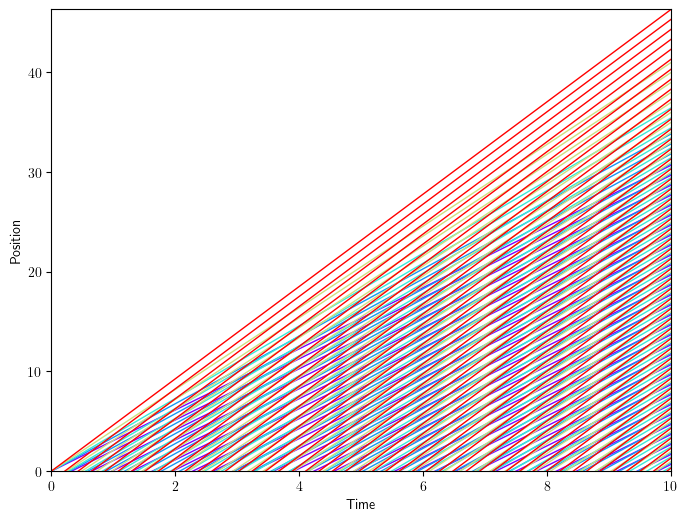

In [2]:
# vs = np.arange(0.2, 2.1, 0.5)  # Velocity values from 0.1 to 2.0
vs=np.sort(np.random.normal(4,1,5))
t0,tf= 0, 10
t = np.linspace(0, 10, 100)
Cs = np.arange(-100, 100, 1)
fig,axis=plt.subplots(1, 1, figsize=(8, 6))
cmap= mpl.cm.get_cmap("rainbow", len(Cs))
norm= mpl.colors.Normalize(vmin=vs.min(), vmax=vs.max())
xmax = vs.max()* tf 
for i in range(len(vs)):
    v = vs[i]
    # Plotting the lines for each velocity
    # Using a colormap to color the lines based on velocity
    color= cmap(norm(v))
    for j in range(len(Cs)):
        C = Cs[j]
        x = v * t + C
        linestyle="-"
        linewidth = 1
        alpha = 0.5
        if C > 0:
            color="k"
            linestyle="--"
            linewidth = 0.5
            alpha= .01
            continue
        axis.plot(t, x, c=color, linestyle=linestyle, linewidth=linewidth, )
ylims = axis.get_ylim()
axis.set_ylim([-0, xmax])
axis.set_xlim([t0,tf])
axis.set_xlabel("Time ")
axis.set_ylabel("Position ")

so the critera to not be zero, is that $x/t < v$... And this is valid for each specific v.... So this means if I want to find the density, I am basically working with the function 

$$
    f(x,v,t) = \begin{cases}
    \mathcal{N}(v|v_0,\sigma_v) & \mathrm{if }\text{ } (x/t) < v\\
    0 & \mathrm{otherwise}
    \end{cases}
$$

so getting the density in the x,t plane is a matter of getting the 0th order moment about the velocities 

$$ \rho(x,t) = \int_{x/t}^{\infty} \mathcal{N}(v|v_0\sigma_v) dv $$ 

which basically states that the amount of matter you have at a given place only takes particles that are faster than the current position divided by the time, which makes sense because you need to be at least faster than that speed to reach that position. This gaussian is none other than the complimentary error function: 

$$ \rho(x,t) = (1/2) \mathrm{erfc}\left( \frac{x/t-v_o}{\sqrt{2}\sigma_v} \right) $$


In [3]:
# pick some values 
v0 = 4
sigma_v = 1 
xmax = 10 
tmax = xmax/(v0+2*sigma_v)
x = np.linspace(0,xmax,100)
t = np.linspace(0,tmax,100)
# Calculate the error function values
X,T = np.meshgrid(x, t)
erf_values = (1/2)*special.erfc((X - v0 * T) / (sigma_v * np.sqrt(2)))

0
24
48
72
96


/var/folders/vt/72vlp8hj577dnzr1gl35j41c0000gn/T/ipykernel_87816/2326962724.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = mpl.cm.get_cmap("Blues")


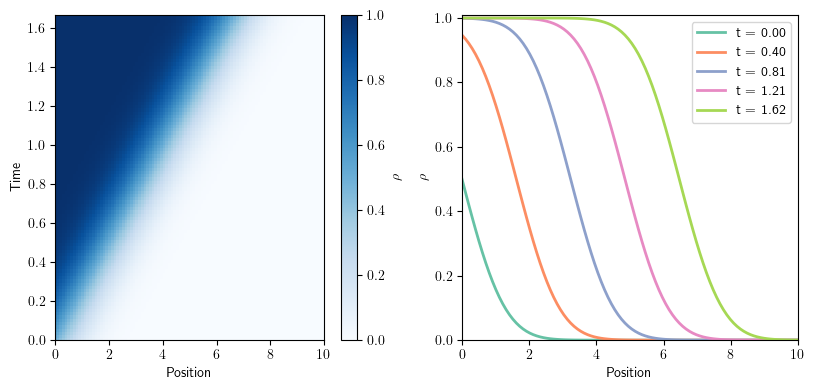

In [4]:


# make the pcolormesh
cmap = mpl.cm.get_cmap("Blues")
fig,axis= plt.subplots(1, 2, figsize=(8.25, 4))
c = axis[0].pcolormesh(X, T, erf_values, cmap=cmap, shading='auto')
axis[0].set_xlabel("Position")
axis[0].set_ylabel("Time")
axis[0].set_xlim([0, xmax])
axis[0].set_ylim([0, tmax])
fig.colorbar(c, ax=axis[0], label=r'$\rho$')
plt.tight_layout()

# get 4 time indexes 
for i in range(0, len(t) , len(t)//4 -1):
    print(i)
    axis[1].plot(x, erf_values[i, :], lw=2,label="t = {:.2f}".format(t[i]))
axis[1].set_xlabel("Position")
axis[1].set_ylabel(r'$\rho$')
axis[1].set_xlim([0, xmax])
axis[1].set_ylim([0, 1.01])
axis[1].legend()
plt.tight_layout()

when I try to solve this numerically later, I will try and put in v and sigma that vary with the period of the orbit and I will use a keplerian orbit 

/var/folders/vt/72vlp8hj577dnzr1gl35j41c0000gn/T/ipykernel_87816/3378613528.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = mpl.cm.get_cmap("rainbow")


(np.float64(0.39999999999999997), np.float64(1.5999554179038629))

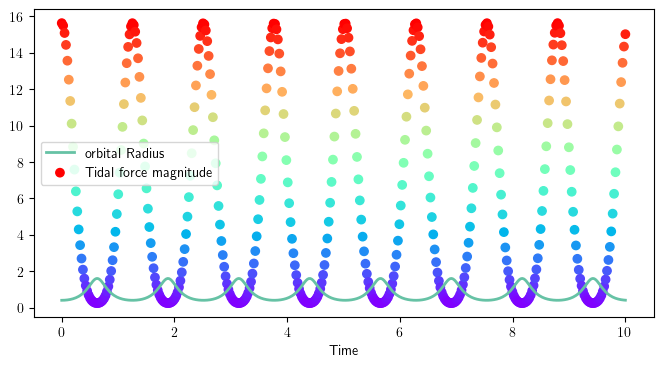

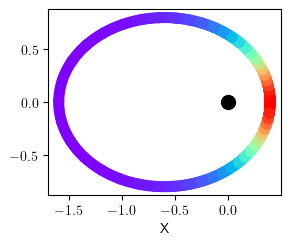

In [5]:
# make a changing amplitude as a function of time for the amount of material that is being ejected: 
a = 1
omega = 5
e = 0.6
t = np.linspace(0, 10, 400)
radius=(a*(1-e**2)/ (1 + e*np.cos(omega * t)))
tidal = radius**(-3)
theta = np.mod(omega*t, 2*np.pi)
cmap = mpl.cm.get_cmap("rainbow")
norm = mpl.colors.Normalize(vmin=tidal.min(), vmax=tidal.max())
colors = cmap(norm(tidal))
x = radius * np.cos(theta)
y = radius * np.sin(theta)
fig,axis= plt.subplots(1,1, figsize=(8, 4))
axis.plot(t, radius, lw=2, label="orbital Radius")
axis.scatter(t, tidal, c=colors,label="Tidal force magnitude")
axis.set_xlabel("Time")
axis.legend()
fig,axis= plt.subplots(1, 1, figsize=(3, 3))
axis.scatter(x, y, c=colors, lw=2, label="Orbit")
axis.scatter(0, 0, c='k', s=100, label="Star")
axis.set_xlabel("X")
axis.set_aspect('equal')
radius.min(), radius.max()

now, what are the mean velocity moments? 

$$ \langle v \rangle = \int_{x/t}^{\infty} v \mathcal{N}(v|v_0\sigma_v) dv $$ 

$$ \langle v^2 \rangle = \int_{x/t}^{\infty} v^2 \mathcal{N}(v|v_0\sigma_v) dv $$ 

$$  \sigma_v^2 = \langle v^2\rangle - \langle v \rangle^2$$ 

I found that the first moment for the mean velocity goes as: 

$$ \langle v \rangle (x,t) = \frac{1}{\rho(x,t)} \left[\sigma_v \mathcal{N}\left(x/t|v,\sigma_v\right) + v_0\right]

In [6]:
def density_profile(x,t,vo,sigma_v):
    """
    Calculate the density profile for a given position x, time t, 
    initial velocity vo, and velocity dispersion sigma_v.
    """
    # dedimensionalize this 
    z = (x/t-vo) / sigma_v
    return (1/2) * special.erfc(z / np.sqrt(2))

def mean_velocity_moment(x,t,vo,sigma_v):
    """
    Calculate the mean velocity moment for a given position x, time t, 
    initial velocity vo, and velocity dispersion sigma_v.
    """
    # dedimensionalize this 
    rho = density_profile(x, t, vo, sigma_v)
    # prepare argument to the gaussian 
    z = (x/t - vo) / sigma_v
    return  vo + sigma_v * stats.norm.pdf(z) / rho
    


def second_order_velocity_moment(x,t,vo,sigma_v):
    """
    Calculate the second order velocity moment for a given position x, time t, 
    initial velocity vo, and velocity dispersion sigma_v.
    """
    # dedimensionalize this 
    z = (x/t - vo) / sigma_v
    phi = stats.norm.pdf(z)
    rho = density_profile(x, t, vo, sigma_v)
    # prepare argument to the gaussian 
    
    term1 = sigma_v**2 * (z * phi + rho)
    term2 = 2 * sigma_v * vo * phi
    term3 = vo**2 * rho    
    return (term1 + term2 + term3) / rho


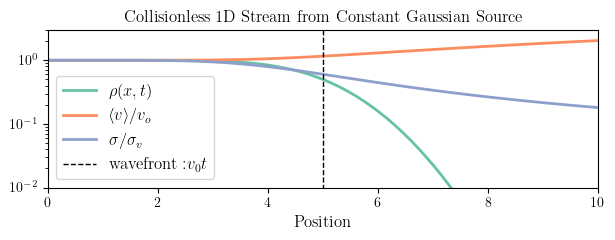

In [7]:
# pick some quantities 
sigma_v = 1
v_0 = 5
# calculate the error function values
x = np.linspace(0, 10, 100)
t = 1
# calculate the density profile
rho = density_profile(x, t, v_0, sigma_v)
# calculate the mean velocity moment
mean_v = mean_velocity_moment(x, t, v_0, sigma_v)
secondorder=second_order_velocity_moment(x, t, v_0, sigma_v)
dispersion = (secondorder - mean_v**2)
# make the plotpastel1
colors = plt.get_cmap('Set2').colors

fig, axis = plt.subplots(1, 1, figsize=(8.25-2, 2.5))
axis.plot(x, rho, lw=2, label=r"$\rho(x,t)$",color=colors[0],alpha=1)
axis.plot(x, mean_v/v_0, lw=2, label=r"$\langle v \rangle / v_o$", color=colors[1],alpha=1)
axis.plot(x, np.sqrt(dispersion)/sigma_v, lw=2, label=r"$\sigma /\sigma_v $", color=colors[2],alpha=1)
axis.set_xlabel(r"$\mathrm{Position}$",size="large")
axis.vlines([v_0*t],0,3, lw=1, linestyle="--" ,color='k', label=r"$\mathrm{wavefront:} v_0 t$")
axis.set_yscale('log')
axis.set_ylim([1e-2, 3])
axis.set_xlim([0, 10])
axis.legend(fontsize="large")
axis.set_title(r"$\textrm{Collisionless 1D Stream from Constant Gaussian Source }$")
fig.tight_layout()
fig.savefig("../../images/collisionless_1D_stream.png", bbox_inches='tight', dpi=300)

what about a source that depends on time? 

$$ g(v,t) = A(t) \mathcal{N}(v|v_o(t),\sigma_v(t)) $$

$$
\begin{align}
A(t)&\propto A f(t)  \\
v_o(t)&\propto v_o f(t) \\
\sigma_v(t)&\propto \sigma_o f(t)
\end{align}
$$
where 
$$ 
f(t) = r(t)^{-3}
$$

and if I take a keplerian orbit: 
$$
r(t) = \left(\frac{a(1-e^2)}{1+e\cos(\omega t)}\right)
$$

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def r(t, a=1.0, e=0.5, omega=1.0,omega0=np.pi/2):
    """Modulation function for the source."""
    return a * (1 - e**2) / (1 + e * np.cos(omega * t + omega0))

# Source modulation function f(t)
def f(t, a=1.0, e=0.5, omega=1.0, omega0=np.pi/2):
    return r(t, a, e, omega,omega0) ** (-3)

# Compute density at position x and time t
def rho_xt(x, t, v0, sigma0, A=1.0, a=1.0, e=0.5, omega=1.0, N=1000, omega0=np.pi/2):
    t_prime = np.linspace(1e-6, t - 1e-6, N)  # avoid division by zero
    dt = t / N

    f_t = f(t_prime, a=a, e=e, omega=omega,omega0=omega0)
    v_source = v0 
    sigma_source = sigma0 
    A_t = A * f_t

    v_arrival = x / (t - t_prime)
    prefactor = A_t / (t - t_prime)

    G = stats.norm.pdf(v_arrival, loc=v_source, scale=sigma_source)
    integrand = prefactor * G
    return np.sum(integrand * dt)

# Compute mean velocity and dispersion
def velocity_moments(x, t, v0, sigma0, A=1.0, a=1.0, e=0.5, omega=1.0, N=1000,omega0=np.pi/2):
    t_prime = np.linspace(1e-6, t - 1e-6, N)
    dt = t / N

    f_t = f(t_prime, a=a, e=e, omega=omega,omega0=omega0)
    v_source = v0 
    sigma_source = sigma0 
    A_t = A * f_t

    v_arrival = x / (t - t_prime)
    prefactor = A_t / (t - t_prime)
    G = stats.norm.pdf(v_arrival, loc=v_source, scale=sigma_source)
    integrand = prefactor * G

    rho = np.sum(integrand * dt)
    moment1 = np.sum(v_arrival * integrand * dt)
    moment2 = np.sum((v_arrival**2) * integrand * dt)

    mean_v = moment1 / rho
    var_v = moment2 / rho - mean_v**2
    return rho, mean_v, np.sqrt(var_v)



NOTE. I abandoned this becuase picking the choice of initial conditions that represents a stream is not trivial. Also, I'm not sure what there is to gain here as growing the complexity of the simpified model isn't becoming any different than doing the full stream simulations and then analyzing them. However, perahps I can return to this if I ever think about how to include a gap disturbance in this picture to quantify its persistence in some regions compared to others. 

For instance, it's not clear to me if I should have the flux, mean velocity, and dispersion, all correlate with the magnitude of the tidal force. The results look pretty wonly when I do that. however, when I remove f(t) for the v and sigma, the results look like they make more sense. But it's all good for now. 

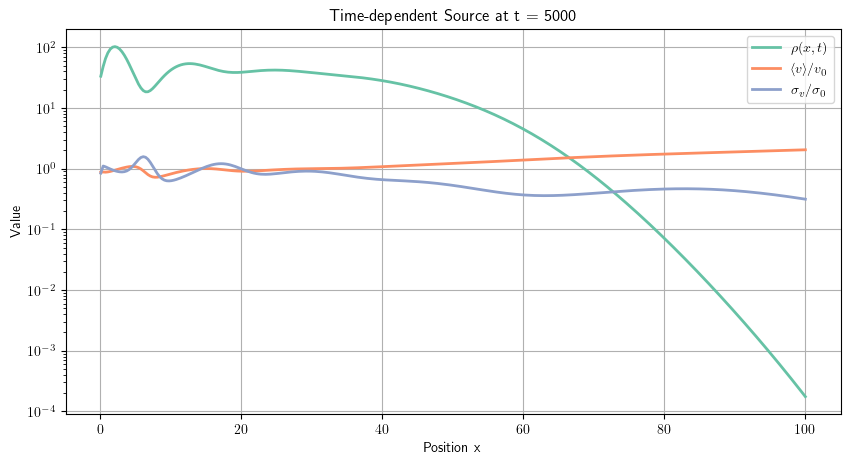

In [9]:
# Parameters
v0 = 1/100
sigma0 = 1/400
omega0 = np.pi/2 # put us at the pericenter
a = 1.0
e = 0.6
omega = 2 * np.pi  # period of 5 units
xmax=100
t = 5000
A = 1.0/f(t, a=a, e=e, omega=omega, omega0=np.pi/2)
x_vals = np.linspace(0.1, 100, 300)

# Calculate profiles
rho_vals = []
mean_v_vals = []
disp_vals = []

for x in x_vals:
    rho, mean_v, disp = velocity_moments(x, t, v0, sigma0, A, a, e, omega)
    rho_vals.append(rho)
    mean_v_vals.append(mean_v)
    disp_vals.append(disp)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(x_vals, np.array(rho_vals)*A, label=r"$\rho(x,t)$", lw=2)
ax.plot(x_vals, np.array(mean_v_vals)/v0, label=r"$\langle v \rangle / v_0$", lw=2)
ax.plot(x_vals, np.array(disp_vals)/sigma0, label=r"$\sigma_v / \sigma_0$", lw=2)
# ax.axvline(v0 * f(t, a, e, omega) * t, color='k', linestyle='--', label="source position at time t")
ax.set_xlabel("Position x")
ax.set_ylabel("Value")
ax.set_title(f"Time-dependent Source at t = {t}")
ax.legend()
ax.grid(True)

ax.set_yscale('log')
